# Geometric Brownian Motion Demo

Geometric Brownian Motion (GBM) is a continuous stochastic process in which a logarithm of varying parameter follows a Brownian Motion, given by:

$S_t = S_0 e^{(\mu - \frac{\sigma^2}{2}) + \sigma W_t}$,

where $S_0$ is the initial value, $\mu$ and $\sigma$ are drift and difussion coefficients, respectively, and $W_t$ is a (Standard) Brownian Motion.

GBM is commonly used to model stock prices and options payoffs. 

In [1]:
import qmcpy as qp
import numpy as np
import scipy.stats
import pandas as pd
import time
from matplotlib import pyplot
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

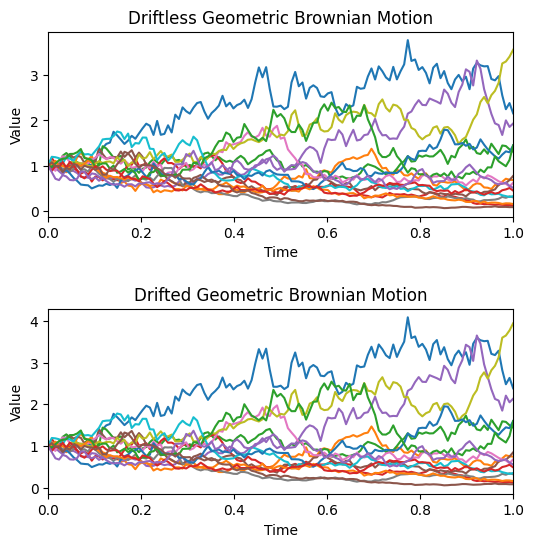

In [2]:
n = 16
discrete_distrib = qp.Lattice(2**7)
geometric_brownian_motions = {
    'Driftless Geometric Brownian Motion': qp.GeometricBrownianMotion(discrete_distrib),
    'Drifted Geometric Brownian Motion': qp.GeometricBrownianMotion(discrete_distrib,drift=0.1)}
fig,ax = pyplot.subplots(nrows=len(geometric_brownian_motions),ncols=1,figsize=(6,3*len(geometric_brownian_motions)))
ax = np.atleast_1d(ax)
for i,(name,gbm) in enumerate(geometric_brownian_motions.items()):
    t = gbm.gen_samples(n)
    t_w_init = np.hstack([gbm.initial_value*np.ones((n,1)),t])
    tvec_w_0 = np.hstack([0,gbm.time_vec])
    ax[i].plot(tvec_w_0,t_w_init.T)
    ax[i].set_xlim([tvec_w_0[0],tvec_w_0[-1]])
    ax[i].set_title(name)
    ax[i].set_xlabel('Time')  
    ax[i].set_ylabel('Value') 
plt.subplots_adjust(hspace=0.5)
plt.show();


In [3]:
def plot_gbm_paths(gbm, n, title):
    
    t = gbm.gen_samples(n)
    t_w_init = np.concatenate([gbm.initial_value * np.ones((n, 1)), t], axis=1)
    tvec_w_0 = np.concatenate([[0], gbm.time_vec])

    # Plot the paths
    plt.figure(figsize=(7, 4))
    for i in range(n):
        plt.plot(tvec_w_0, t_w_init[i, :])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.xlim([tvec_w_0[0], tvec_w_0[-1]])
    plt.show()

# 

GBM using Standard Uniform Distribution 

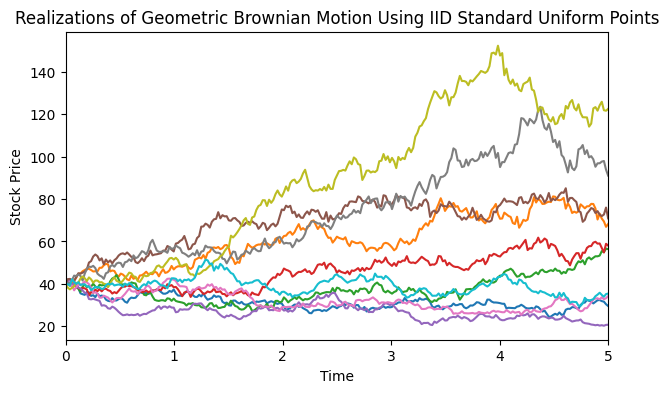

In [4]:

gbm_iid = qp.GeometricBrownianMotion(qp.IIDStdUniform(2**8, seed=7), t_final=5, initial_value=40, drift=0.1, diffusion=0.2)
plot_gbm_paths(gbm_iid, n=10, title='Realizations of Geometric Brownian Motion Using IID Standard Uniform Points')

GBM using low-discrepancy Lattice sequence distrubtion 

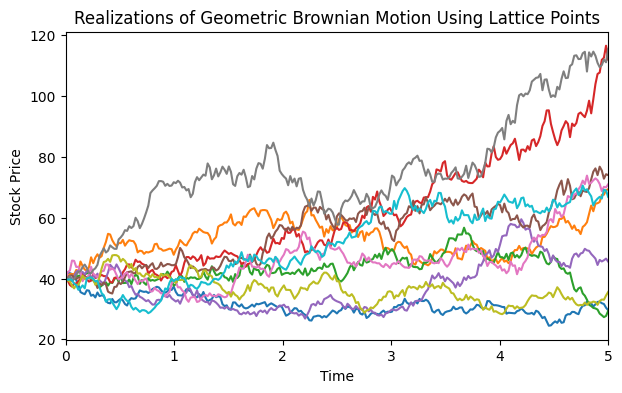

In [5]:
gbm_lattice = qp.GeometricBrownianMotion(qp.Lattice(2**8, seed=7), t_final=5, initial_value=40, drift=0.1, diffusion=0.2)
plot_gbm_paths(gbm_lattice, n=10, title='Realizations of Geometric Brownian Motion Using Lattice Points')

The following code defines a set of sliders to control parameters for simulating paths of GBM. It sets the machine epsilon (eps) as the minimum value for  `initial_value`, `t_final` and `diffusion` sliders, ensuring they are never zero.  The `plot_gbm_paths` function then visualizes the GBM paths based on the specified parameters.

In [6]:
eps = np.finfo(float).eps
slider_style = {'handle_color': 'blue'}

@widgets.interact
def f(n=widgets.IntSlider(min=0, max=11, step=1, value=8, style=slider_style),
      t_final=widgets.FloatSlider(min=eps, max=5, step=0.1, value=5, style=slider_style),
      initial_value=widgets.FloatSlider(min=eps, max=100, step=0.1, value=40, style=slider_style),
      drift=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0.1, style=slider_style),
      diffusion=widgets.FloatSlider(min=eps, max=4, step=0.1, value=0.2, style=slider_style)):
    
    gbm = qp.GeometricBrownianMotion(qp.Lattice(2**n, seed=7), t_final=t_final, initial_value=initial_value, drift=drift, diffusion=diffusion)
    plot_gbm_paths(gbm, n=10, title='Realizations of Geometric Brownian Motion Using Lattice Points')


interactive(children=(IntSlider(value=8, description='n', max=11, style=SliderStyle(handle_color='blue')), Flo…